In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('allergies.csv', parse_dates=['STOP'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,76982e06-f8b8-4509-9ca3-65a99c8650fe,1982-09-01,NaN,999-21-5604,S99957470,X55072337X,Ms.,Christal240,Brown30,NaN,...,42.284598,-71.134497,779464.29,11713.81,1982-10-25,NaT,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300916003,Latex allergy
1,76982e06-f8b8-4509-9ca3-65a99c8650fe,1982-09-01,NaN,999-21-5604,S99957470,X55072337X,Ms.,Christal240,Brown30,NaN,...,42.284598,-71.134497,779464.29,11713.81,1982-10-25,NaT,76982e06-f8b8-4509-9ca3-65a99c8650fe,b896bf40-8b72-42b7-b205-142ee3a56b55,300913006,Shellfish allergy
2,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2000-11-21,2012-11-21,999-28-2716,NaN,NaN,NaN,Carmelia328,Konopelski743,NaN,...,42.291986,-71.463724,268920.58,9406.69,2002-01-25,NaT,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,419474003,Allergy to mould
3,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2000-11-21,2012-11-21,999-28-2716,NaN,NaN,NaN,Carmelia328,Konopelski743,NaN,...,42.291986,-71.463724,268920.58,9406.69,2002-01-25,NaT,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,232347008,Dander (animal) allergy
4,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2000-11-21,2012-11-21,999-28-2716,NaN,NaN,NaN,Carmelia328,Konopelski743,NaN,...,42.291986,-71.463724,268920.58,9406.69,2002-01-25,NaT,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,7be1a590-4239-4826-9872-031327f3c368,418689008,Allergy to grass pollen


In [3]:
dt_stop = df_al['STOP'].dropna()
dt_stop = dt_stop.unique()
dt_stop

array(['2014-03-20T00:00:00.000000000', '2018-01-30T00:00:00.000000000',
       '2019-12-30T00:00:00.000000000', '2010-09-01T00:00:00.000000000',
       '2013-06-25T00:00:00.000000000', '2013-12-18T00:00:00.000000000',
       '2015-11-30T00:00:00.000000000', '2019-09-12T00:00:00.000000000',
       '2019-08-03T00:00:00.000000000', '1993-07-10T00:00:00.000000000',
       '2010-10-28T00:00:00.000000000', '2020-03-21T00:00:00.000000000',
       '2011-02-03T00:00:00.000000000', '2018-12-17T00:00:00.000000000',
       '2018-11-22T00:00:00.000000000', '2019-10-21T00:00:00.000000000',
       '2017-01-31T00:00:00.000000000', '2016-11-21T00:00:00.000000000',
       '2018-04-11T00:00:00.000000000', '2019-12-25T00:00:00.000000000',
       '2011-03-09T00:00:00.000000000', '2014-02-05T00:00:00.000000000',
       '2015-10-05T00:00:00.000000000', '2016-04-04T00:00:00.000000000',
       '2015-06-13T00:00:00.000000000', '2018-09-08T00:00:00.000000000',
       '2019-05-02T00:00:00.000000000', '2016-09-18

In [4]:
df_al['STOP'] = df_al['STOP'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['STOP'] = df_al['STOP'].replace({pd.NaT: "0"})
df_al['STOP']

0      0
1      0
2      0
3      0
4      0
      ..
592    0
593    0
594    0
595    0
596    0
Name: STOP, Length: 597, dtype: object

In [5]:
contigency = pd.crosstab(df_al['STOP'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Allergy to bee venom,Allergy to dairy product,Allergy to eggs,Allergy to fish,Allergy to grass pollen,Allergy to mould,Allergy to nut,Allergy to peanuts,Allergy to soya,Allergy to tree pollen,Allergy to wheat,Dander (animal) allergy,House dust mite allergy,Latex allergy,Shellfish allergy
STOP,,,,,,,,,,,,,,,
1,0,3,6,0,10,11,0,0,1,6,5,10,9,3,0
0,33,15,14,30,50,70,31,25,7,57,20,67,52,21,41


<AxesSubplot:xlabel='DESCRIPTION', ylabel='STOP'>

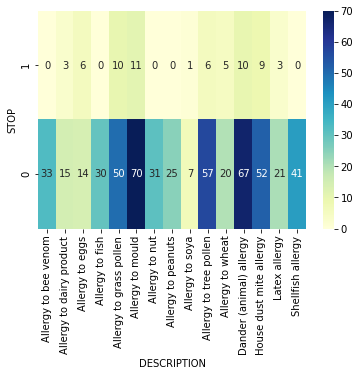

In [6]:
plt.figure(figsize=(6,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

0.0017699786560638126

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'DESCRIPTION']
label_column = ['STOP']

In [9]:
dataset = df_al[features_column + label_column]
dataset['STOP'] = dataset['STOP'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'DESCRIPTION': Index(['Allergy to bee venom', 'Allergy to dairy product', 'Allergy to eggs',
       'Allergy to fish', 'Allergy to grass pollen', 'Allergy to mould',
       'Allergy to nut', 'Allergy to peanuts', 'Allergy to soya',
       'Allergy to tree pollen', 'Allergy to wheat', 'Dander (animal) allergy',
       'House dust mite allergy', 'Latex allergy', 'Shellfish allergy'],
      dtype='object')}


<ipython-input-9-452f4aa08d9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['STOP'] = dataset['STOP'].astype('int32')
<ipython-input-9-452f4aa08d9e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-452f4aa08d9e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('STOP')
test_labels = test_features.pop('STOP')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
12/12 [==============================] - 0s 11ms/step - loss: 0.2992 - accuracy: 0.8272 - val_loss: 0.2395 - val_accuracy: 0.8854
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1826 - accuracy: 0.8953 - val_loss: 0.1666 - val_accuracy: 0.8854
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1509 - accuracy: 0.8953 - val_loss: 0.1578 - val_accuracy: 0.8854
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1365 - accuracy: 0.8953 - val_loss: 0.1469 - val_accuracy: 0.8854
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1287 - accuracy: 0.8953 - val_loss: 0.1389 - val_accuracy: 0.8854
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1224 - accuracy: 0.8953 - val_loss: 0.1324 - val_accuracy: 0.8854
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1203 - accuracy: 0.8953 - val_loss: 0.1287 - val_accuracy: 0.8854
Epoch 8/100


In [15]:
model.evaluate(test_features[features_column], test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 0.1275 - accuracy: 0.8908


[0.12748493254184723, 0.8907563090324402]

In [16]:
model.save('model_allergies')

INFO:tensorflow:Assets written to: model_allergies\assets
